<a href="https://colab.research.google.com/github/minwooking/03.Machine-Learning-Lecture-2021/blob/main/03_04_classification_ipynb%20%EB%A6%AC%EB%B7%B0%EC%97%90%EB%A6%AC%EB%B7%B0%EB%A5%BC%20%EB%8D%94%ED%95%98%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# matplotlib에서 한글 사용을 위하 한글폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# 설치후 런타임 재시작한 후, 이 코드는 실행하지 말것

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

### 3.4 분류
#### 3.4.1 kNN
- 학습 파라미터가 없다. 게이른 학습기
- k는 튜닝 파라미터


y = {0, 1}
![](https://www.kdnuggets.com/wp-content/uploads/popular-knn-metrics-0.png)

책에 있는 notation:
- x, y : 각각 하나의 점(데이터)
- n: 데이터의 차원

일반적인 notation:
- X.shape = (n, p)
- $X_i, X_j$ : 각각 하나의 점(데이터)
- p: 데이터의 차원. 변수의 수가 p

유클리디안 거리:
$$\begin{align}
d_{euclid} &= \sqrt{(x_{i1} - x_{j1})^2 + (x_{i2} - x_{j2})^2 + \cdots + (x_{ip} - x_{jp})^2}\\
&= \sqrt{(X_i - X_j)^T \cdot (X_i - X_j)}\\
&= \sqrt{\sum_{k=1}^p {(x_{ik} - x_{jk})^2}}
\end{align}$$
- $X_i = (x_{i1}, x_{i2}, \cdots, x_{ip})$

맨하튼 거리:
$$d_{manhatton} = \sum_{k=1}^p {|x_{ik} - x_{jk}|}$$

민코프스키 거리:
$$d_{M,d} = \sqrt[d]{\sum_{k=1}^p {(x_{ik} - x_{jk})^d}}$$
- d=1: 맨하튼 거리
- d=2: 유클리디안 거리

마할라노비스 거리:
$$d_{M} = \sqrt{(X_i - X_j) \Sigma^{-1} (X_i - X_j)^T}$$
- $\Sigma$ : $X_i$에 대한 공분산 행렬
- 공분산 행렬이 단위행렬인 마할라노비스 거리는 유클리디안 거리와 동일

공분산 행렬:
- 변수 k 분산: $Var(X_{.k}) = \sigma_k^2 = \frac 1 n \sum_{i=1}^n {(X_{ik} - \bar X_{.k})^2}$
- 2개 변수간의 흩어짐의 정도를 공분산: $Cov(X_{.k} - X_{.m})$
 - $Cov(X_{.k} - X_{.m}) = \frac 1 n \sum_{i=1}^n {(X_{ik} - \bar X_{.k})(X_{im} - \bar X_{.m})}$
 - $Cor(X_{.k} - X_{.m}) = \frac 1 n \cfrac {\sum_{i=1}^n {(X_{ik} - \bar X_{.k})(X_{im} - \bar X_{.m})}}{\sigma_k \sigma_m}$
- 공분산 행렬: $\Sigma_{km} = Cov(X_{.k} - X_{.m})$

In [ ]:
import numpy as np
import pandas as pd

arr = np.random.randn(100, 2)
arr.shape

(100, 2)

In [ ]:
np.cov(arr.T)

array([[ 1.23971255, -0.07493186],
       [-0.07493186,  1.06685805]])

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = load_iris()
# 탐색적 분석을 하기가 용이하다
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)

X_train, X_test, y_train, y_test = train_test_split(data, dataset.target, random_state=42)

<function matplotlib.pyplot.show>

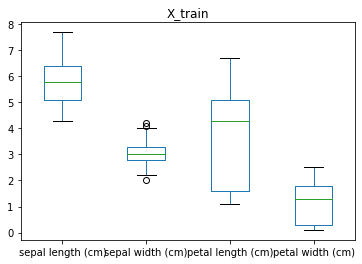

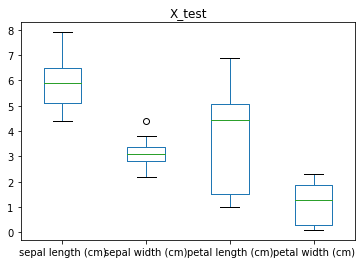

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

X_train.plot(kind='box')
plt.title("X_train")
plt.show
X_test.plot(kind='box')
plt.title("X_test")
plt.show

거리를 기반으로하는 알고리즘은 반듯이 scaling을 해줘야 한다. why?:
- 측정 단위가 다르면 거리는 측정단위(g)가 작은 데이터에 의해 거리가 결정된다.

scaling을 반듯이 해줘야 하는 알고리즘은 또 있다. 무엇일까?
- 선형모델
 - 회귀: Ridge, Lasso. $\alpha * |w|$에 대한 규제.
     - 회귀식: $y = 3.6 + 1.3 x_1 - 0.2 x_2 + 0.077 x_3$
 - 분류: Logistc Regression, SVM는 w에 대한 규제.
- 분산(밀도)을 이용하는 모델: <= 거리기반
 - PCA
 - DBSCAN
 - kernel estimation method

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# fit: 학습한다라는 의미인데, 반듯이 학습데이터에만 fit을 해준다.
# Scaler는 연속형 데이터의 단위를 변경하므로, 입력은 연속형이어야한다.
mns = MinMaxScaler().fit(X_train)
X_train_scaled = mns.transform(X_train)
X_test_scaled = mns.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

preds = model.predict(X_test_scaled)
accuracy_score(y_test, preds)

1.0

In [ ]:
model.score(X_test_scaled, y_test)

1.0

In [ ]:
mns.data_max_

array([7.7, 4.2, 6.7, 2.5])

In [ ]:
Max = mns.data_max_
Min = mns.data_min_
pd.DataFrame({'max':Max, 'min':Min}, index=dataset.feature_names).T

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
max,7.7,4.2,6.7,2.5
min,4.3,2.0,1.1,0.1


In [ ]:
X_train[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9


In [ ]:
mns.inverse_transform(X_train_scaled[:3])

array([[5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9]])

마할라노비스 거리를 적용하려면:
$$d_{M} = \sqrt{(X_i - X_j) \Sigma^{-1} (X_i - X_j)^T}$$
- $\Sigma$ : $X_i$에 대한 공분산 행렬
- 공분산 행렬이 단위행렬인 마할라노비스 거리는 유클리디안 거리와 동일

In [ ]:
# from sklearn.neighbors import DistanceMetric
# import scipy
# V = np.cov(X_train_scaled)
# # mahalanobis를 사용하려면 metric_params에 V(공분산)와 VI(공분산 역행렬)을 지정
# nnMaha = KNeighborsClassifier(metric='mahalanobis', 
#                               metric_params={'V':V, 'VI':scipy.linalg.inv(V)})
# nnMaha.fit(X_train_scaled, y_train)
# nnMaha.score(X_test_scaled, y_test)

[Quiz] ks = [1, 3, 5, 7, 9, 11]로 두고 가장 정확도가 높은 k를 찾고, 그 때의 정확도를 출력하라.

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# fit: 학습한다라는 의미인데, 반듯이 학습데이터에만 fit을 해준다.
# Scaler는 연속형 데이터의 단위를 변경하므로, 입력은 연속형이어야한다.
# mns = MinMaxScaler().fit(X_train)
mns = StandardScaler().fit(X_train)
X_train_scaled = mns.transform(X_train)
X_test_scaled = mns.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
ks = [1, 3, 5, 7, 9, 11]

def kNNtuner(ks, xtr, ytr, xts, yts):
    best = {}
    scores = {}
    scores['k'] = []
    scores['acc'] = []
    bs = 0
    for k in ks:
        m = KNeighborsClassifier(k).fit(xtr, ytr)
        acc = m.score(xts, yts)
        scores['k'].append(k)
        scores['acc'].append(acc)
        if acc > bs:
            bs = acc
            best['k'] = k
            best['acc'] = acc
            best['m'] = m
    
    import pandas as pd
    scores = pd.DataFrame(scores)
    
    return best, scores

best, scores = kNNtuner(ks, X_train_scaled, y_train, X_test_scaled, y_test)

print(best)
scores

{'k': 1, 'acc': 1.0, 'm': KNeighborsClassifier(n_neighbors=1)}


,k,acc
0,1,1.0
1,3,1.0
2,5,1.0
3,7,1.0
4,9,1.0
5,11,1.0


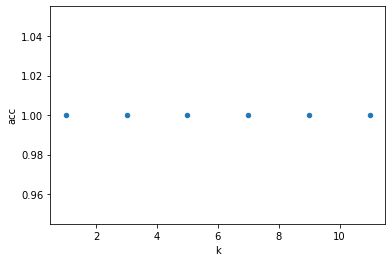

In [ ]:
scores.plot.scatter('k', 'acc')

### 2.4.2 Logistic Regression
$\hat y = P(y=1) = \sigma (X \cdot w + b)$

In [ ]:
import numpy as np
np.random.seed(42)

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

dataset = load_breast_cancer()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data['cancer'] = dataset.target

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


- 입력피처 X 의 shape은 (n, p)
- 타겟 y의 shape은 (n, )

### simple Logistic Regression
1개의 입력변수만 사용하여 모델을 구성해봅니다.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['mean radius']], data['cancer'], random_state=42)

In [ ]:
X_train.shape

(426, 1)

In [ ]:
data[['mean radius']].shape

(569, 1)

규제가 있는 분류모델:
Loss = NLL(w) + $\cfrac 1 C * ||w||^2$
- C: 규제강도인 $\alpha$의 역수에 해당
- SVM에서 사용하는 C와 같은 개념으로 사용하기 위해 C로 명명.

In [ ]:
from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(solver='liblinear').fit(X_train, y_train)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print(f"mean radius 만으로 예측한 결과 : {score}")

mean radius 만으로 예측한 결과 : 0.916083916083916


In [ ]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

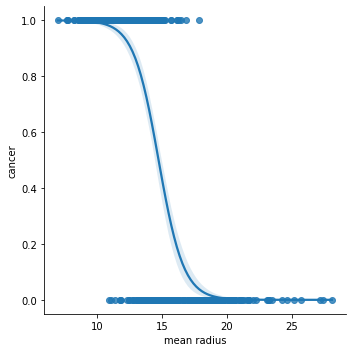

In [ ]:
from seaborn import lmplot
import matplotlib.pyplot as plt
%matplotlib inline

lmplot(x='mean radius', y='cancer', data=data, logistic=True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], 
                                                    data['cancer'], 
                                                    random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print(f"전체 학습 변수를 모두 이용하여 예측한 결과 : {score}")

전체 학습 변수를 모두 이용하여 예측한 결과 : 0.958041958041958


[Quiz] C가 중요한 튜닝 파라미터이다.
1. RobustScaler를 사용하여 Scaling한다.
2. Scaled data를 이용하여 C에 대해 튜닝하고
3. 가장 좋은 C와 이때의 acc 값을 출력하라.

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cs = [0.001, 0.01, 0.1, 1, 10, 100]
# Cs = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
Cs = [0.05, 0.1, 0.5]

def LRtuner(Cs, xtr, ytr, xts, yts):
    best = {}
    scores = {}
    scores['C'] = []
    scores['acc'] = []
    bs = 0
    for C in Cs:
        m = LogisticRegression(C=C, max_iter=200).fit(xtr, ytr)
        acc = m.score(xts, yts)
        scores['C'].append(C)
        scores['acc'].append(acc)
        if acc > bs:
            bs = acc
            best['C'] = C
            best['acc'] = acc
            best['m'] = m
    
    import pandas as pd
    scores = pd.DataFrame(scores)
    
    return best, scores

best, scores = LRtuner(Cs, X_train_scaled, y_train, X_test_scaled, y_test)

print(best)
scores

{'C': 0.05, 'acc': 0.986013986013986, 'm': LogisticRegression(C=0.05, max_iter=200)}


,C,acc
0,0.05,0.986014
1,0.10,0.986014
2,0.50,0.986014


[Quiz] StratifiedFold와 GridSearchCV를 이용하여 위와 같이 튜닝하고 가장 좋은 모델에서의 accuracy를 구하라.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
estimator = LogisticRegression(max_iter=200)
params= {'penalty':['l1', 'l2'],
        'C':[0.001, 0.01, 0.1, 1, 10, 100]}
model = GridSearchCV(estimator, params, cv=cv, verbose=1,
                    n_jobs=-1, refit=True)

# refit=True인 경우라면 재학습은 불필요하다. 
model.fit(X_train_scaled, y_train)

print(f"Best Estimator: {model.best_estimator_}\n")
print(f"Best Params: {model.best_params_}\n")
print(f"Best Scorer: {model.best_score_}\n")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Estimator: LogisticRegression(C=1, max_iter=200)

Best Params: {'C': 1, 'penalty': 'l2'}

Best Scorer: 0.9836388508891929



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

In [ ]:
model.best_estimator_.score(X_test_scaled, y_test)

0.986013986013986

다시 튜닝하면:

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
estimator = LogisticRegression(max_iter=200, penalty='l2')
params= {'C':[0.2, 0.25, 0.3, 0.35, 0.4, 0.45]}
model = GridSearchCV(estimator, params, cv=cv, verbose=1,
                    n_jobs=-1, refit=True)

# refit=True인 경우라면 재학습은 불필요하다. 
model.fit(X_train_scaled, y_train)

print(f"Best Estimator: {model.best_estimator_}\n")
print(f"Best Params: {model.best_params_}\n")
print(f"Best Scorer: {model.best_score_}\n")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Estimator: LogisticRegression(C=0.3, max_iter=200)

Best Params: {'C': 0.3}

Best Scorer: 0.9812859097127223



In [ ]:
model.best_estimator_.score(X_test_scaled, y_test)

0.993006993006993

### 2.4.3 Decision Tree
규칙기반으로 학습데이터를 나누는 알고리즘으로 규칙은 전체 데이터로 이뤄진 전체 엔트로피(또는 지니계수)를 낮추는 방향으로 결정된다.

아래 그림과 같이 규칙에 대해 True인 경우는 왼쪽으로 False로 나누는 것은 업계의 관례이다.
![](tree2.png)

위 그림에서 root부터 leaf에 도달까지의 split depth는 5로 제한하여 완벽히 나눠지지 않도록 overfit을 방지하였다. Decision Tree(이하 DT)는 overfit될 위험이 높익 때문에 일반적으로 다음과 같은 규제를 가한다.
1. max depth의 제한: 보통 8이하로 설정
2. min split samples: 나누기 위해 필요한 branch의 샘플 수(또는 비율)
3. min leaf samples: leaf가 되기 위해 필요한 샘플 수(또는 비율)
4. max leaf nodes: leaf의 수를 제한

In [ ]:
coinProb = np.array([.5, .5])
coinProb

array([0.5, 0.5])

앞뒷면이 나올확률이 동등한 동전에서 entropy를 계산하면:
- 동전의 앞면이 나올확률 : coinProb[0]
- 동전의 뒷면이 나올확률 : coinProb[1]

$$Entropy(p) = - \sum_i^C p_i \log p_i$$
- C는 가능한 class의 수

In [ ]:
Ecoin = - np.sum(coinProb * np.log2(coinProb))
Ecoin

1.0

In [ ]:
coinProb = np.array([.9, .1])
Ecoin = - np.sum(coinProb * np.log2(coinProb))
Ecoin

0.4689955935892812

[Quiz] 동전의 앞면이 나올확률이 0.01 ~ 0.99 변동할 때 이때의 entropy를 계산하고 그래프로 그려보자.

In [ ]:
proby1 = np.arange(0.01, 1, 0.01)
proby1.shape

(99,)

In [ ]:
def binaryEntropy(pArr):
    sum = 0
    sum -= pArr*np.log2(pArr)
    sum -= (1-pArr)*np.log2(1-pArr)
    return sum

In [ ]:
entropy = binaryEntropy(proby1)

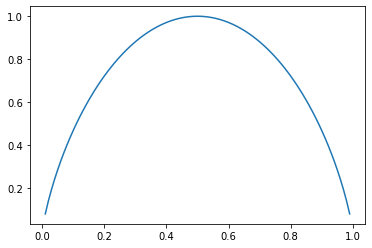

In [ ]:
import matplotlib.pyplot as plt
plt.plot(proby1, entropy)

gini 계수를 계산하면:
$$Gini(p) = \sum_i^C {p_i(1-p_i)} = 1 - \sum_i^C p_i^2$$

In [ ]:
def gini(p):
    sum = 1
    sum -= p**2
    sum -= (1-p)**2
    return sum

In [ ]:
sp = pd.Series(proby1)

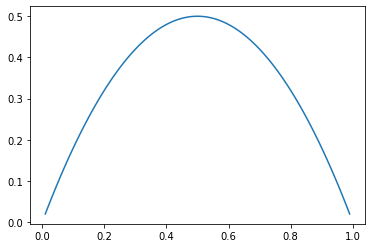

In [ ]:
Gcoin = sp.map(gini)
Gcoin.index = proby1
Gcoin.plot()

3가지 색의 구슬이 들어있는 전체집단 S에서의 엔트로피를 계산해보자.

In [ ]:
gooseuls = [0]*8 + [1]*7 + [2]*5
gooseuls

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

In [ ]:
S = pd.Series(gooseuls)
S.value_counts()

0    8
1    7
2    5
dtype: int64

In [ ]:
nS = len(S)
nS

20

In [ ]:
S.value_counts() / nS

0    0.40
1    0.35
2    0.25
dtype: float64

In [ ]:
probS = S.value_counts(normalize=True)
probS

0    0.40
1    0.35
2    0.25
dtype: float64

[Quiz] probS를 이용하여 Entropy를 계산해보자.

In [ ]:
def Entropy(probs):
    return - np.sum(probs*np.log2(probs))

In [ ]:
SEntropy = Entropy(probS)
SEntropy

1.5588718484453603

turns로 나뉜 집단에 대한 E(S')을 계산하고, 이에 따른 정보이득 Gain(S)를 도출하자.
$$ \begin{align}
E(S') &= \sum_g {\cfrac {n(S_g)}{n(S)}E(S_g)} \\
&= \cfrac{n(S_{left})}{n(S)}E(S_{left}) + \cfrac{n(S_{right})}{n(S)}E(S_{right})
\end{align}$$

이때 정보이득은 아래와 같이 계산된다.
$$I_G(S) = E(S) - E(S')$$

내가 2개의 집단으로 나눴는데:
- left: [0,0,0,0,0,1,1,2,2,2]
- right: [0,0,0,1,1,1,1,1,2,2]

이때 정보이득을 계산하라

In [ ]:
turns = ['left']*5 + ['right']*3 + ['left']*2 + ['right']*5 + ['left']*3 + ['right']*2
turns = pd.Series(turns)
turns.tail()

15     left
16     left
17     left
18    right
19    right
dtype: object

In [ ]:
turns.shape

(20,)

In [ ]:
N = len(S)
groups = S.groupby(turns)

In [ ]:
for key, g in groups:
    print(key)
    print(g)
    print("=============")

left
0     0
1     0
2     0
3     0
4     0
8     1
9     1
15    2
16    2
17    2
dtype: int64
right
5     0
6     0
7     0
10    1
11    1
12    1
13    1
14    1
18    2
19    2
dtype: int64


In [ ]:
SprimeEntropy = 0
for _, g in groups:
    gprobs = g.value_counts(normalize=True)
    splitN = len(g)
    SprimeEntropy += splitN / N * Entropy(gprobs)
    print(SprimeEntropy)

SEntropy - SprimeEntropy

0.7427376486136672
1.4854752972273344


0.07339655121802591

[Quiz] 다음과 같은 변수 sex가 있을 때, sex로 나누는 경우에 대한 entropy와 gain을 구하라.

In [ ]:
gooseuls

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

In [ ]:
sex = ['F']*9 + ['M']*10 + ['F']

In [ ]:
newS = S.copy()
newS.index = sex
newS

F    0
F    0
F    0
F    0
F    0
F    0
F    0
F    0
F    1
M    1
M    1
M    1
M    1
M    1
M    1
M    2
M    2
M    2
M    2
F    2
dtype: int64

In [ ]:
sex = pd.Series(sex)
groups = S.groupby(sex)

SprimeEntropy = 0
for _, g in groups:
    gprobs = g.value_counts(normalize=True)
    splitN = len(g)
    SprimeEntropy += splitN / N * Entropy(gprobs)
    print(SprimeEntropy)

SEntropy - SprimeEntropy

0.46096404744368114
0.9464393446710154


0.6124325037743449

In [ ]:
for key, g in groups:
    print(key)
    print(g)
    print("=============")

F
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
19    2
dtype: int64
M
9     1
10    1
11    1
12    1
13    1
14    1
15    2
16    2
17    2
18    2
dtype: int64


In [ ]:
pd.concat([S, turns, sex], axis=1)

,0,1,2
0,0,left,F
1,0,left,F
2,0,left,F
3,0,left,F
4,0,left,F
5,0,right,F
6,0,right,F
7,0,right,F
8,1,left,F
9,1,left,M


#### sklearn 실습

In [ ]:
import seaborn as sns

data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

아래와 같이 alone은 버려도된다.

In [ ]:
np.all((data.sibsp + data.parch == 0) == data.alone)

True

아래 정보에서 보듯이 age, embarked, deck에 결측치가 있는 것을 알 수 있다. 나중에 보간이 필요하다.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


deck를 먼저 제거하고 작업하고, 나중에는 포함하여 작업해보자.

In [ ]:
data.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [ ]:
data[data.deck.isna()][data[data.deck.isna()].fare > data.fare.mean()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
35,0,1,male,42.0,1,0,52.0000,S,First,man,True,NaN,Southampton,no,False
43,1,2,female,3.0,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,1,3,male,32.0,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True
846,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
848,0,2,male,28.0,0,1,33.0000,S,Second,man,True,NaN,Southampton,no,False
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False


In [ ]:
data.fare.mean()

32.2042079685746

who 도 검증을 해보자.

In [ ]:
data.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [ ]:
data[data.who == "child"].age.max()

15.0

In [ ]:
prep_data_with_deck = data.drop(columns=['alive', 'who', 'adult_male', 'class', 'embark_town', 'alone'])
prep_data = prep_data_with_deck.drop("deck", axis=1)

prep_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


결측치를 제거할 때 사용하는 일반적인 과정
- dropna: 결측치가 있는 row를 제거하고,
- reset_index(drop=True): 기존 이빨빠진 index를 제거하고, 새로 순서에 따른 index를 부여하다.

> 결측치를 제거하는 것이 좋은 지, 대체하는 것이 좋은 지는 분석가가 결정해야 한다. 일반적으로 제거하는 것은 좋은 방법이 아니다.

In [ ]:
# prep_data = prep_data.dropna()
# prep_data = prep_data.reset_index(drop=True)
prep_data = prep_data.dropna().reset_index(drop=True)
prep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 44.6+ KB


모든 문자열 데이터를 수치형으로 변환

In [ ]:
prep_data.sex = prep_data.sex.map(lambda x: 1 if x == 'male' else 0)

In [ ]:
import pandas as pd
prep_data = pd.get_dummies(prep_data)

In [ ]:
prep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    712 non-null    int64  
 1   pclass      712 non-null    int64  
 2   sex         712 non-null    int64  
 3   age         712 non-null    float64
 4   sibsp       712 non-null    int64  
 5   parch       712 non-null    int64  
 6   fare        712 non-null    float64
 7   embarked_C  712 non-null    uint8  
 8   embarked_Q  712 non-null    uint8  
 9   embarked_S  712 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 41.1 KB


In [ ]:
prep_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [ ]:
prep_data.iloc[:, 1:]

,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
707,3,0,39.0,0,5,29.1250,0,1,0
708,2,1,27.0,0,0,13.0000,0,0,1
709,1,0,19.0,0,0,30.0000,0,0,1
710,1,1,26.0,0,0,30.0000,1,0,0


모두 수치형으로 변환되었으므로, 모델을 작성해보자.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(prep_data.iloc[:, 1:], 
                                                   prep_data.iloc[:, 0],
                                                   random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

In [ ]:
fnames = list(prep_data.columns[1:])

In [ ]:
from sklearn.tree import export_text
print(export_text(model, feature_names=fnames))

|--- sex <= 0.50
|   |--- pclass <= 2.50
|   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- class: 0
|--- sex >  0.50
|   |--- pclass <= 1.50
|   |   |--- class: 0
|   |--- pclass >  1.50
|   |   |--- class: 0



In [ ]:
score = model.score(X_test, y_test)
score

0.7584269662921348

In [ ]:
from matplotlib import font_manager
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name = font_manager.FontProperties(fname=r"C:\Users\Administrator\Downloads\malgun.ttf").get_name()
# plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

피처 중요도:
[0.29899614 0.70100386 0.         0.         0.         0.
 0.         0.         0.        ]


(-1.0, 9.0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_

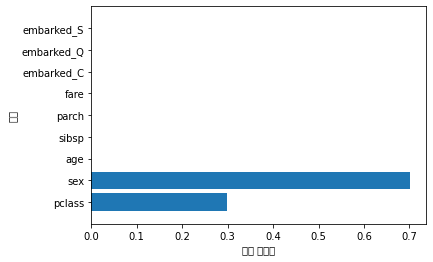

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print(f"피처 중요도:\n{model.feature_importances_}")

n_features = X_train.shape[1]
plt.barh(np.arange(n_features),
        model.feature_importances_,
        align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("피처 중요도")
plt.ylabel('피처')
plt.ylim(-1, n_features)

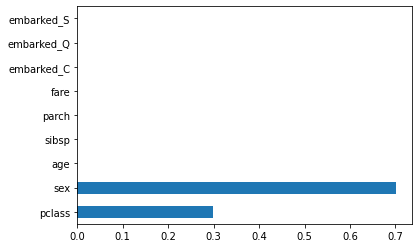

In [ ]:
ft_import = pd.Series(model.feature_importances_, index=X_train.columns)
# ft_import.plot.barh()
ft_import.plot(kind='barh')

In [ ]:
from sklearn import tree

<function matplotlib.pyplot.show>

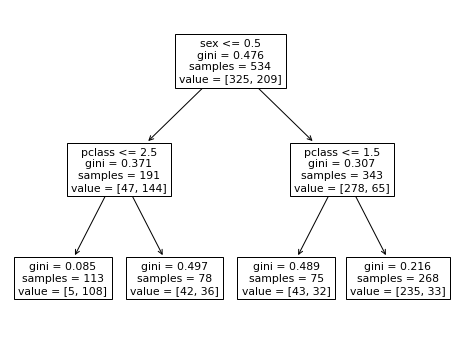

In [ ]:
plt.figure(figsize=(8,6))
tree.plot_tree(model, feature_names=prep_data.columns[1:])
plt.show

In [ ]:
X_train.shape

(534, 9)

생존자의 비율이 40%이고, 사망자의 비율이 60%인거죠.
- root에서의 majority는 사망

In [ ]:
y_train.mean()

0.3913857677902622

In [ ]:
X_train.sex.value_counts() / X_train.sex.size

1    0.642322
0    0.357678
Name: sex, dtype: float64

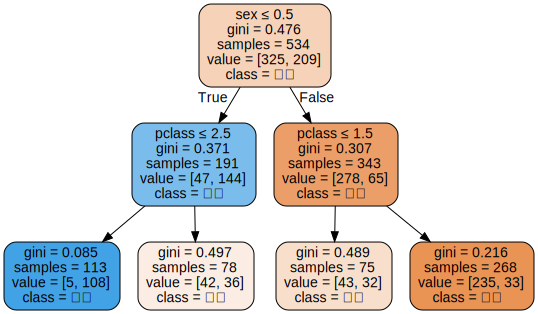

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model, out_file=None,
                feature_names=X_train.columns,  
                class_names=['사망', '생존'],  
                filled=True, rounded=True,  
                special_characters=True)

graph = graphviz.Source(dot_data)
graph

[Quiz] Decision Tree를 튜닝하여 예측정확도를 개선하자.

In [ ]:
def retAllparams(d):
    ret = []
    for i, (k, vs) in enumerate(d.items()):
        if i == 0:
            for v in vs:
                init = {}
                init[k] = v
                ret.append(init)
        else:
            subAll = []
            for v in vs:
                sub = []
                for dct in ret:
                    dt = dct.copy()
                    dt[k] = v
                    sub.append(dt)
                subAll = subAll + sub
            ret = subAll
    return ret

In [ ]:
paramgrids = {'max_depth': [2, 3, 4, 5, 6],
              'max_leaf_nodes': [5, 7, 9, 11,13],
              'min_samples_leaf': [1, 3, 5],
              'min_samples_split': [2, 4, 8]}

In [ ]:
retAllparams(paramgrids)

[{'max_depth': 2,
  'max_leaf_nodes': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 {'max_depth': 3,
  'max_leaf_nodes': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 {'max_depth': 4,
  'max_leaf_nodes': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 {'max_depth': 5,
  'max_leaf_nodes': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 {'max_depth': 6,
  'max_leaf_nodes': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 {'max_depth': 2,
  'max_leaf_nodes': 7,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 {'max_depth': 3,
  'max_leaf_nodes': 7,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 {'max_depth': 4,
  'max_leaf_nodes': 7,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 {'max_depth': 5,
  'max_leaf_nodes': 7,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 {'max_depth': 6,
  'max_leaf_nodes': 7,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 {'max_depth': 2,
  'max_leaf_nodes': 9,
  'min_samples_leaf': 1,
  'm

In [ ]:
def DTtuner(paramgrids, xtr, ytr, xts, yts):
    best = {}
    scores = []
    bs = 0
    for params in retAllparams(paramgrids):
        print("now trying params is", params)
        m = DecisionTreeClassifier(**params)
        m.fit(xtr, ytr)
        acc = m.score(xts, yts)
        scores.append(params)
        scores[-1]['acc'] = acc
        if acc > bs:
            bs = acc
            best['params'] = params
            best['acc'] = acc
            best['m'] = m
    
    import pandas as pd
    scores = pd.DataFrame(scores)
    
    return best, scores

best, scores = DTtuner(paramgrids, X_train, y_train, X_test, y_test)

print(best)
scores

now trying params is {'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
now trying params is {'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
now trying params is {'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
now trying params is {'max_depth': 5, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
now trying params is {'max_depth': 6, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
now trying params is {'max_depth': 2, 'max_leaf_nodes': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
now trying params is {'max_depth': 3, 'max_leaf_nodes': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
now trying params is {'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
now trying params is {'max_depth': 5, 'max_leaf_nodes': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
now trying params is {'max_depth': 6, 'max_lea

,max_depth,max_leaf_nodes,min_samples_leaf,min_samples_split,acc
0,2,5,1,2,0.758427
1,3,5,1,2,0.769663
2,4,5,1,2,0.769663
3,5,5,1,2,0.769663
4,6,5,1,2,0.769663
...,...,...,...,...,...
220,2,13,5,8,0.758427
221,3,13,5,8,0.747191
222,4,13,5,8,0.730337
223,5,13,5,8,0.741573


In [ ]:
scores.loc[scores.max_depth == 6]

,max_depth,max_leaf_nodes,min_samples_leaf,min_samples_split,acc
4,6,5,1,2,0.769663
9,6,7,1,2,0.792135
14,6,9,1,2,0.713483
19,6,11,1,2,0.741573
24,6,13,1,2,0.730337
29,6,5,3,2,0.769663
34,6,7,3,2,0.775281
39,6,9,3,2,0.730337
44,6,11,3,2,0.735955
49,6,13,3,2,0.747191


[Quiz] paramgrids를 이용하여 gridsearchcv를 이용한 튜닝을 수행해보자.

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
cv=KFold(5, shuffle=True, random_state=123)
m = DecisionTreeClassifier()
estimator = GridSearchCV(m, paramgrids, n_jobs=-1, cv=cv)
estimator.fit(X_train, y_train)
estimator.score(X_test, y_test)

0.7696629213483146

In [ ]:
print(estimator.best_params_)
print(estimator.best_score_)

{'max_depth': 6, 'max_leaf_nodes': 13, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.8332569211779226


이전에는:
- 중복데이터 제거하고,
- 결측치도 제거해버렸는데, 

이번에는 중복데이터를 제거하고, 결측데이터를 보간하여 결과를 보도록 하자.

In [ ]:
prep_data = data.drop(columns=['alive', 'who', 'adult_male', 'class', 'embark_town'])
prep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   deck      203 non-null    category
 9   alone     891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(4), object(2)
memory usage: 57.9+ KB


LabelEncoder는 문자열에 대해 올림차순으로 0부터 정수값을 부여한다.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# 알파벳 순서가 빠른 female = 0, male = 1
prep_data['sex'] = le.fit_transform(prep_data['sex'])
prep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    int64   
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   deck      203 non-null    category
 9   alone     891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(5), object(1)
memory usage: 57.9+ KB


In [ ]:
data.deck.value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

#### 결측치 대체
1) age의 결측치를 pclass와 sex의 평균값으로 대체

In [ ]:
prep_data[prep_data.age.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,alone
5,0,3,1,NaN,0,0,8.4583,Q,NaN,True
17,1,2,1,NaN,0,0,13.0000,S,NaN,True
19,1,3,0,NaN,0,0,7.2250,C,NaN,True
26,0,3,1,NaN,0,0,7.2250,C,NaN,True
28,1,3,0,NaN,0,0,7.8792,Q,NaN,True
...,...,...,...,...,...,...,...,...,...,...
859,0,3,1,NaN,0,0,7.2292,C,NaN,True
863,0,3,0,NaN,8,2,69.5500,S,NaN,False
868,0,3,1,NaN,0,0,9.5000,S,NaN,True
878,0,3,1,NaN,0,0,7.8958,S,NaN,True


In [ ]:
ageGoupMean = prep_data.groupby(['pclass', 'sex']).age.mean().reset_index()
ageGoupMean

,pclass,sex,age
0,1,0,34.611765
1,1,1,41.281386
2,2,0,28.722973
3,2,1,30.740707
4,3,0,21.750000
5,3,1,26.507589


In [ ]:
prep_data = pd.merge(prep_data, ageGoupMean, on=['pclass', 'sex'])
prep_data.head()

,survived,pclass,sex,age_x,sibsp,parch,fare,embarked,deck,alone,age_y
0,0,3,1,22.0,1,0,7.2500,S,NaN,False,26.507589
1,0,3,1,35.0,0,0,8.0500,S,NaN,True,26.507589
2,0,3,1,NaN,0,0,8.4583,Q,NaN,True,26.507589
3,0,3,1,2.0,3,1,21.0750,S,NaN,False,26.507589
4,0,3,1,20.0,0,0,8.0500,S,NaN,True,26.507589


In [ ]:
prep_data.tail()

,survived,pclass,sex,age_x,sibsp,parch,fare,embarked,deck,alone,age_y
886,0,2,1,28.0,0,1,33.0,S,NaN,False,30.740707
887,0,2,1,21.0,1,0,11.5,S,NaN,False,30.740707
888,0,2,1,24.0,0,0,13.0,S,NaN,True,30.740707
889,0,2,1,28.0,0,0,10.5,S,NaN,True,30.740707
890,0,2,1,27.0,0,0,13.0,S,NaN,True,30.740707


In [ ]:
prep_data[(prep_data.pclass == 1) & (prep_data.sex == 1)]

,survived,pclass,sex,age_x,sibsp,parch,fare,embarked,deck,alone,age_y
585,0,1,1,54.0,0,0,51.8625,S,E,True,41.281386
586,1,1,1,28.0,0,0,35.5000,S,A,True,41.281386
587,0,1,1,19.0,3,2,263.0000,S,C,False,41.281386
588,0,1,1,40.0,0,0,27.7208,C,NaN,True,41.281386
589,0,1,1,28.0,1,0,82.1708,C,NaN,False,41.281386
...,...,...,...,...,...,...,...,...,...,...,...
702,1,1,1,NaN,0,0,29.7000,C,C,True,41.281386
703,1,1,1,51.0,0,0,26.5500,S,E,True,41.281386
704,0,1,1,31.0,0,0,50.4958,S,A,True,41.281386
705,0,1,1,33.0,0,0,5.0000,S,B,True,41.281386


In [ ]:
prep_data['age'] = prep_data.age_x.fillna(prep_data.age_y)
prep_data.head()

,survived,pclass,sex,age_x,sibsp,parch,fare,embarked,deck,alone,age_y,age
0,0,3,1,22.0,1,0,7.2500,S,NaN,False,26.507589,22.000000
1,0,3,1,35.0,0,0,8.0500,S,NaN,True,26.507589,35.000000
2,0,3,1,NaN,0,0,8.4583,Q,NaN,True,26.507589,26.507589
3,0,3,1,2.0,3,1,21.0750,S,NaN,False,26.507589,2.000000
4,0,3,1,20.0,0,0,8.0500,S,NaN,True,26.507589,20.000000


In [ ]:
prep_data.deck.astype('str').value_counts()

nan    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

사실 age가 결측치일 때, who의 child 여부를 확인했어야 한다.

In [ ]:
# category data to string
prep_data.deck = prep_data.deck.astype('str').fillna('None')
prep_data.embarked = prep_data.embarked.fillna('None')
prep_data.head()

,survived,pclass,sex,age_x,sibsp,parch,fare,embarked,deck,alone,age_y,age
0,0,3,1,22.0,1,0,7.2500,S,nan,False,26.507589,22.000000
1,0,3,1,35.0,0,0,8.0500,S,nan,True,26.507589,35.000000
2,0,3,1,NaN,0,0,8.4583,Q,nan,True,26.507589,26.507589
3,0,3,1,2.0,3,1,21.0750,S,nan,False,26.507589,2.000000
4,0,3,1,20.0,0,0,8.0500,S,nan,True,26.507589,20.000000


In [ ]:
prep_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age_x     714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   deck      891 non-null    object 
 9   alone     891 non-null    bool   
 10  age_y     891 non-null    float64
 11  age       891 non-null    float64
dtypes: bool(1), float64(4), int64(5), object(2)
memory usage: 84.4+ KB


결측처리하여 age와 중복된 열인 age_x, age_y를 제거한다.

In [ ]:
prep_data = prep_data.drop(columns=['age_x', 'age_y'])
prep_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  891 non-null    object 
 7   deck      891 non-null    object 
 8   alone     891 non-null    bool   
 9   age       891 non-null    float64
dtypes: bool(1), float64(2), int64(5), object(2)
memory usage: 70.5+ KB


#### 범주형을 수치형으로 변환
아래 코드는 pandas의 get_dummies 함수를 이용하면 한번에 처리해준다.
```python
prep_data = pd.get_dummies(prep_data)
```

In [ ]:
prep_data = pd.get_dummies(prep_data)
prep_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   survived       891 non-null    int64  
 1   pclass         891 non-null    int64  
 2   sex            891 non-null    int64  
 3   sibsp          891 non-null    int64  
 4   parch          891 non-null    int64  
 5   fare           891 non-null    float64
 6   alone          891 non-null    bool   
 7   age            891 non-null    float64
 8   embarked_C     891 non-null    uint8  
 9   embarked_None  891 non-null    uint8  
 10  embarked_Q     891 non-null    uint8  
 11  embarked_S     891 non-null    uint8  
 12  deck_A         891 non-null    uint8  
 13  deck_B         891 non-null    uint8  
 14  deck_C         891 non-null    uint8  
 15  deck_D         891 non-null    uint8  
 16  deck_E         891 non-null    uint8  
 17  deck_F         891 non-null    uint8  
 18  deck_G    

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder()
# # fit의 대상은 2-d array이다. 따라서 Series가 아닌 DataFrame을 전달해야 함.
# ohe.fit_transform(prep_data[['embarked']])

In [ ]:
# embarked_unique = prep_data.embarked.unique()
# embarked_unique

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder()
# embarked_df = prep_data[['embarked']]
# embarked_ohe = ohe.fit_transform(embarked_df)
# embarked_df = pd.DataFrame(embarked_ohe.toarray(), columns=embarked_unique)
# embarked_df.sample(5)

In [ ]:
# prep_data = pd.concat([prep_data, embarked_df], axis=1)
# prep_data.drop('embarked', axis=1, inplace=True)
# prep_data.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(prep_data.iloc[:, 1:],
                                                    prep_data.iloc[:, 0])

In [ ]:
paramgrids
dtc = GridSearchCV(DecisionTreeClassifier(), paramgrids, n_jobs=1, cv=cv)
dtc.fit(X_train, y_train)
dtc

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_leaf_nodes': [5, 7, 9, 11, 13],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 8]})

In [ ]:
dtc.best_params_, dtc.best_score_

({'max_depth': 6,
  'max_leaf_nodes': 11,
  'min_samples_leaf': 5,
  'min_samples_split': 2},
 0.8264055661541916)

In [ ]:
dtc.score(X_test, y_test)

0.8071748878923767

### 2.4.4 Naive Bayse
아래 수식에서 제시된 바와 같이 각 변수들이 서로 독립이라는 순진한 가정하에서 $P(x_i|y)$를 계산하므로 각 변수들($x_i$)이 범주형일 때 좋은 성능을 갖는다.

$$\begin{align}
posterior &= \cfrac {likelihood * prior} {marginal probability} \\
P(y|X) &= P(X|y) P(y) / P(X) \\
&= P(x_1, \cdots, x_p | y) P(y) / P(x_1, \cdots, x_p) \\
&= \cfrac {P(x_1|y)\cdots P(x_p|y) P(y)} {P(x_1)\cdots P(x_p)} \\
&= \cfrac {\prod_{i=1}^p P(x_i|y) P(y)}{\prod_{i=1}^p P(x_i)}
\end{align}$$

$$\begin{align}
P(y=1|X) &= P(X|y=1) P(y=1) / P(X) \\
&= \cfrac {\prod_{i=1}^p P(x_i|y=1) P(y=1)}{\prod_{i=1}^p P(x_i)} \\
&\sim \prod_{i=1}^p P(x_i|y=1) P(y=1) \\
\log{P(y=1|X)} &\sim \sum_{i=1}^p \log{P(x_i|y=1)} + \log{P(y=1)} \\
P(y=0|X) &= P(X|y=0) P(y=0) / P(X) \\
&= \cfrac {\prod_{i=1}^p P(x_i|y=0) P(y=1)}{\prod_{i=1}^p P(x_i)} \\
&\sim \prod_{i=1}^p P(x_i|y=0) P(y=0)\\
\log{P(y=0|X)} &\sim \sum_{i=1}^p \log{P(x_i|y=0)} + \log{P(y=0)}
\end{align}$$

$P(x_1, \dots, x_p)$는 관측된 상수이므로 다음과 같은 분류 규칙을 사용할 수 있다:
$$\begin{aligned}
P(y \mid x_1, \dots, x_p) \propto P(y) \prod_{i=1}^{p} P(x_i \mid y) & \\
\Downarrow & \\
\hat{y} = \arg\max_y P(y) \prod_{i=1}^{p} P(x_i \mid y) &
\end{aligned}$$

In [ ]:
# !dir/w weath*
from google.colab import drive
import os, shutil

drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/Colab Notebooks/')
!pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [ ]:
%ls # chdir 에 뭐가 있는지보여주는 명령어 

'03.04.classification.ipynb의 사본'
'03.04.classification.ipynb의 사본 실행되는것'
'spam-filtering-with-naive-bayes.ipynb의 사본 나이브 베이즈 사용예제'
 weather.nominal.csv


In [ ]:
import pandas as pd
data = pd.read_csv('weather.nominal.csv')
data

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


컬럼명 앞뒤로 공백이 존재하므로, 이를 제거해줘야 한다.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   outlook       14 non-null     object
 1    temperature  14 non-null     object
 2    humidity     14 non-null     object
 3    windy        14 non-null     bool  
 4    play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [ ]:
names = pd.Series(data.columns.values) # 데이터의 컬럼들을 빼서 시리즈로만들고 
names = names.str.strip() # str을 함수를 쓰면 문자열 처럼 다룰수있게바꿔주고 strip 을 적용해준다. 
for name in names:        # 중간에있는 공백 없앨려면 replace 등등 을 써야한다. 
    print(name) #  람다 함수로 적용해보기. 

outlook
temperature
humidity
windy
play


In [ ]:
data.columns = names ## 기계들은 조그마한 앞뒤공백이 자주있음 있는 보기좋게 하려면 공백을 줘서일렬로쭉 줘서 한다.
data.info()          ##  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   windy        14 non-null     bool  
 4   play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [ ]:
data['windy'] = data['windy'].astype(str) # 윈디 타입을 불리언에서 오브젝트 형식으로 바꿔줌 나이브베이즈할려고 

In [ ]:
data.dtypes

outlook        object
temperature    object
humidity       object
windy          object
play           object
dtype: object

In [ ]:
data

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [ ]:
data.groupby('play')[['outlook','temperature']].count() # 정확한 값이 나오지 않음 

,outlook,temperature
play,,
no,5,5
yes,9,9


In [ ]:
tabs = []  # 플레이에대한 빈도수 계산  X라는 현상이 발생했을때 y라는 의사결정을 할 확률은? 을 계산해야함 
for col in data.columns[:-1]: # play를 빼놓고 계산한거임 
    temp = pd.crosstab(data['play'], data[col])  # dot+ group by
    tabs.append(temp)
    
joined_tab = pd.concat(tabs, axis=1) # 결합을 시키는데 axis =1  로한다
joined_tab
### 나이브베이즈를 어떻게 쓰는지 알려줄려고 정리해준거임
# 각각의 확률을 구할수 있음

,overcast,rainy,sunny,cool,hot,mild,high,normal,False,True
play,,,,,,,,,,
no,0,2,3,1,2,2,4,1,2,3
yes,4,3,2,3,2,4,3,6,6,3


In [ ]:
##### size 해서  yes가 몇인지 no가 몇인지 
freqY = data.groupby(['play']).agg('size')
freqY

play
no     5
yes    9
dtype: int64

In [ ]:
data.play.value_counts() # 사이즈랑 벨류 카운츠랑 같은거임 

yes    9
no     5
Name: play, dtype: int64

In [ ]:
# data.play.value_counts()

numpy의 broadcasting 규칙:
1. 마지막 axis의 shape size가 동일하거나, 어느 하나가 1이어야 한다.
2. 다음 axis에서도 동일하게 비교한다.
3. 어느 하나의 axis가 끝날 때까지 반복한다.

(l, m, n) / (o, p)

In [ ]:
Xprob = joined_tab / freqY.values.reshape((-1,1)) # 방법1 방법 2  몰라도 된다는 거임 그냥 규칙만 알면 된다.
Xprob

,overcast,rainy,sunny,cool,hot,mild,high,normal,False,True
play,,,,,,,,,,
no,0.000000,0.400000,0.600000,0.200000,0.400000,0.400000,0.800000,0.200000,0.400000,0.600000
yes,0.444444,0.333333,0.222222,0.333333,0.222222,0.444444,0.333333,0.666667,0.666667,0.333333


In [ ]:
Xprob = joined_tab / freqY.to_frame().values # to 프레임 해주면 셰입이 변경된다./ 
Xprob
# 사칙연산 브로드캐스팅 준수 

,overcast,rainy,sunny,cool,hot,mild,high,normal,False,True
play,,,,,,,,,,
no,0.000000,0.400000,0.600000,0.200000,0.400000,0.400000,0.800000,0.200000,0.400000,0.600000
yes,0.444444,0.333333,0.222222,0.333333,0.222222,0.444444,0.333333,0.666667,0.666667,0.333333


In [ ]:
yprob = freqY / freqY.sum() # 프라이어 프라버블리티  
yprob # 위아래 인덱스 차이점
# 그룹바이를 통해서 구하면 인덱스를 알파벳순으로 정렬함.

play
no     0.357143
yes    0.642857
dtype: float64

In [ ]:
data.play.value_counts(normalize=True)
# value_counts 는 빈도가 높은 순으로 정렬함 
data.play.value_counts(normalize=True)[::-1] # 그래서 역으로 정렬을 해줘야함 
# 비율은 프라버블리티 를 구하는 건데 이렇게 하면 된다. 
# 프라이어를 구한거임
# 아규먼트맥스로 프리딕션 한다고했죠~

no     0.357143
yes    0.642857
Name: play, dtype: float64

우리가 구하려는 것은 날씨가 Sunny, Mild, High, True일 때, 골프를 칠꺼냐(Yes) 말꺼냐(No)이다. 따라서:
- P(Sunny, Mild, High, True|Yes)과
- P(Sunny, Mild, High, True|No) 비교해서,

큰 값으로 선택하면 된다.

위에서 언급 했듯이, 나이브 베이지안 분류기는 모든 변수들의 사건이 독립이라 가정하기 때문에, 
- P(Sunny, Mild, High, True|Yes)는
- P(Sunny|Yes) × ...P(True|Yes)과 같다. 

위의 표를 가지고 직접 계산하여 보자. 먼저 아래와 같은 값을 먼저 계산한다.
- Xprob = [$\cdots, P(x_i|y), \cdots$]
- yprob = $P(y)$

In [ ]:
Xprob.columns # 컬럼들 확인해주고 

Index(['overcast', 'rainy', 'sunny', 'cool', 'hot', 'mild', 'high', 'normal',
       'False', 'True'],
      dtype='object')

In [ ]:
prob = yprob.copy() # 카피 디카피 
for col in ["sunny", "mild", "high", "True"]:
    prob *= Xprob[col].values
    
yprob.index[prob.argmax()] # 여기서 다 구해주는것  arg max를 통해서 많은 값을 구하고 
                           # yporb로 인덱스를 해주면 no를 구할 수 있는것이다. 

'no'

In [ ]:
prob # 여기서 프로버블리티 x로 나눠줘야하는데 아직안했고 이건 정확히 프로버블리티 스코어가 맞는말이다. 

play
no     0.041143
yes    0.007055
dtype: float64

In [ ]:
prob.argmax

<bound method IndexOpsMixin.argmax of play
no     0.041143
yes    0.007055
dtype: float64>

In [ ]:
prob / prob.sum() # 진짜 확률을 구하고 싶으면 이걸해줘야한다. 프로버블리티 섬을하는이유 다시 리뷰해서 생가해보기 


play
no     0.85363
yes    0.14637
dtype: float64

[Quiz] 위 Xprob과 yprob을 이용하여 logprob을 계산해보자.

In [ ]:
logprob = np.log(yprob) # 로그프로버블리티하는이유  로그 취하기 
for col in ["sunny", "mild", "high", "True"]:  # 위랑 다른거없음 로그만 취한거임
    logprob += np.log(Xprob[col].values)
    
print(yprob.index[logprob.argmax()])
logprob # no값이 yes 값보다 큼 

no


play
no    -3.190705
yes   -4.954065
dtype: float64

새로운 데이터 $\mathbf X$에 대한 예측은 다음과 같이 수행한다:
$$P(y = C_k \mid \mathbf X) \;\; \propto \;\; \prod_{i=1}^n P(x_{i} \mid y = C_k)\; P(y = C_k)$$

sklearn은 아래와 같이 input의 특성에 따라 3가지의 NB 모델을 제공한다:

| 구분 | Gaussian NB | Bernoulli NB | Multinormial NB |
|:---:|:---:|:---:|:---:|
| input $x_i$ | interval; continuous; float; integer | binarys (0 or 1) | multinormial (frequency) |
| $P(x_i \mid y = C_k)$ | $\frac{1}{\sqrt{2\pi\sigma^2_{k,i}}} \exp \left[ -\frac{(x_i - \mu_{k,i})^2}{2\sigma^2_{k,i}} \right]$ | $\theta_{k,i}^{x_i} (1-\theta_{k,i})^{(1-x_i)}$ | $\theta_{k,i}^{x_i}$ |
| $\theta_{k,i}$ | . | $\frac {n_{0,i} + \alpha}{N_0 + 2\alpha}$ | $\frac{ N_{yi} + \alpha}{N_y + n \alpha}$ |
| Sparsity Input | poor | very good | good |
| High Dimension input | good | - | good |
| Online Update | O, with partial_fit() | O, with partial_fit() | O, with partial_fit() |



자연어 처리를 위해 online 학습을 하는 좋은 예제로는 [Out-of-core classification of text documents](http://scikit-learn.org/stable/auto_examples/applications/plot_out_of_core_classification.html#sphx-glr-auto-examples-applications-plot-out-of-core-classification-py)이 있다.

#### 1) 다항분포 나이브 베이즈
입력 $\mathbf X$가 multinomial Variable이고, i행 j열의 값 $x_{ij}$는 입력 $\mathbf x_i$의 $j^{th}$ 범주의 빈도값에 해당하는 경우에 적용한다. 

MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None):
- alpha : float, optional (default=1.0). smoothing parameter
- fit_prior : boolean, optional (default=True)
 - class prior probabilities를 학습할 지 여부를 결정한다.
 - False인 경우, uniform prior가 사용된다.
- class_prior : array-like, size (n_classes,), optional (default=None)
 - 각 class의 Prior probabilities를 지정한다.

속성:
- `clases_`: array, shape(n_classes, ). y에 라벨링된 class의 값
- `class_log_prior_` : array, shape (n_classes, )
 - 각 class에 대해 계산된 Smoothed log probability. $\log{P(y)}$
- `intercept_` : property. 선형 모델로 MultinomialNB을 해석하기 위한 `class_log_prior_`
- `feature_log_prob_` : array, shape (n_classes, n_features).
 - class y에 대해 계산된 변수들의 log probability. $\log P(x_i|y)$
- `coef_` : property. 선형 모델로 MultinomialNB을 해석하기 위한 `feature_log_prob_`
- `class_count_` : array, shape (n_classes,). 클래스별 빈도 수.
- `feature_count_` : array, shape (n_classes, n_features). 클래스별 변수 출현 빈도 수.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
multinomial_model = MultinomialNB()
multinomial_model

MultinomialNB()

In [ ]:
data = data.apply(lambda s: s.astype('category'))
data.dtypes # 변수들을 카테고리칼로 바꿈
            # 변수들 카테고리칼 이용해서 변수 확인하기 

outlook        category
temperature    category
humidity       category
windy          category
play           category
dtype: object

In [ ]:
try:
    multinomial_model.fit(data.iloc[:,:-1], data.iloc[:,-1])
except Exception as e:
    print(e)

Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:968: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,


아래와 같이 one-hot encoding없이 category 데이터로 작업할 경우, 잘 못된 결과를 발생시킨다.

In [ ]:
## 데이터들을 원핫 인코딩 시켜줘야한다. 
#data.head() # 우리가 카테고리화 했기 때문에  데이터의 쉐입원의 플레이를 돌면서 룩업테이블을 만들었는데 데이터 각변수별로 유니크한걸 뽑은거임
# 그러면 j 와 p가 나옴  key, value 를 쌍으로 나오게 해서 인덱스화 시키고 각 데이터를 인덱스 화 시킨것\
# 범주형을 전부다 숫자로 바꿈
# 다 숫자로 인식해버림 
# true Fales가 아니라 다 숫자 로 인식해버림 
# 이걸 바꿔 줘야함

for i in range(data.shape[1]-1):
    lookup = {}
    for j, k in enumerate(np.unique(data.iloc[:,i])):
        lookup[k] = j
    data.iloc[:, i] = data.iloc[:, i].map(lookup)
    
data.head()

,outlook,temperature,humidity,windy,play
0,0,1,0,0,yes
1,0,0,1,1,yes
2,0,2,0,1,yes
3,0,1,1,0,yes
4,1,2,0,0,yes


다항모델은 다음과 같이 잘 못 해석한다:
- outlook이 0번, 온도가 1번, 습도가 0번, 바람이 0번 출현할 때 play가 yes다
- outlook이 0번, 온도가 0번, 습도가 1번, 바람이 1번 출현할 때 play가 yes다
- ...

In [ ]:
multinomial_model.fit(data.iloc[:,:-1], data.iloc[:,-1])

MultinomialNB()

우리가 관심있는 Outlook = Sunny, Temperature = Mild,Humidity = High, Windy = True 일때의 y 값을 알아보자.

In [ ]:
multinomial_model.predict([[2,2,0,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


array(['no'], dtype='<U3')

In [ ]:
multinomial_model.predict_proba([[2,2,0,1]]) # 프레딕 프로바 다시보기 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


array([[0.57311795, 0.42688205]])

In [ ]:
multinomial_model.classes_ # no . 0.5 yes 0.5  수기로 계산한것과 값이 다름 

array(['no', 'yes'], dtype='<U3')

아래는 우리가 수기로 계산한 값이다.

In [ ]:
prob / prob.sum() # 0.5 0.5 가아님 
# 제대로 할려면 파일을 읽어서 

play
no     0.85363
yes    0.14637
dtype: float64

값이 달리 나왔다. 이유가 무엇일까?

In [ ]:
data = pd.read_csv('weather.nominal.csv')
names = pd.Series(data.columns.values)
names = names.str.strip() # 이전에 했던작업
data.columns = names
data = data.apply(lambda s: s.astype('category')) # 시리즈 들을 전부다 카테고리화 시켜주기
data.dtypes # 플레이만 빼고 나머지는 겟더미로 원핫 인코딩

outlook        category
temperature    category
humidity       category
windy          category
play           category
dtype: object

In [ ]:
data = pd.get_dummies(data, columns=data.columns[:-1])# 플레이만 빼고 나머지는 겟더미로 원핫 인코딩 시킨것 
data.dtypes

play                category
outlook_overcast       uint8
outlook_rainy          uint8
outlook_sunny          uint8
temperature_cool       uint8
temperature_hot        uint8
temperature_mild       uint8
humidity_high          uint8
humidity_normal        uint8
windy_False            uint8
windy_True             uint8
dtype: object

In [ ]:
data.head()

,play,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_False,windy_True
0,yes,1,0,0,0,1,0,1,0,1,0
1,yes,1,0,0,1,0,0,0,1,0,1
2,yes,1,0,0,0,0,1,1,0,0,1
3,yes,1,0,0,0,1,0,0,1,1,0
4,yes,0,1,0,0,0,1,1,0,1,0


In [ ]:
multinomial_model2 = MultinomialNB(alpha=2) # 튜닝 파라메타 그리드 서치 cv 사용 가능할듯 베스트 팔람스랑 
                                            # 여러가지 사용 가능 할 것이라 생각 됨 
multinomial_model2.fit(data.iloc[:,1:], data.iloc[:,0])
multinomial_model2.predict_proba([[0,0,1, 0,0,1, 1,0, 0,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


array([[0.68094158, 0.31905842]])

In [ ]:
np.exp(multinomial_model.intercept_) # 기울기 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `intercept_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([0.64285714])

In [ ]:
np.exp(multinomial_model.class_log_prior_) # 사전값 

array([0.35714286, 0.64285714])

[quiz] 데이터를 빈도표 형식으로 작성하여 학습해보자 . 이미 작성했잖아 

In [ ]:
data.head()

# outlook_overcast가 한번 발쌩  temp 이 한번 발쌩 

,play,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_False,windy_True
0,yes,1,0,0,0,1,0,1,0,1,0
1,yes,1,0,0,1,0,0,0,1,0,1
2,yes,1,0,0,0,0,1,1,0,0,1
3,yes,1,0,0,0,1,0,0,1,1,0
4,yes,0,1,0,0,0,1,1,0,1,0


In [ ]:
# 빈도표현식 ?으로 바꿔서 하면 

#### 2) 가우시안 나이브 베이즈
GaussianNB는 Gaussian Naive Bayes 분류 알고리즘을 구현하였다. 이 알고리즘에서 targt y가 주어졌을 때의 변수 x의 likelihood는 다음과 같이 Gaussian이라고 가정한다:

$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_{x|y}}} \exp\left(-\frac{(x_i - \mu_{x|y})^2}{2\sigma^2_{x|y}}\right)$$

- 연속형 변수에 대한 target class y를 예측한다.
- 이때, 파마미터 $\sigma_{x|y}$, $\mu_{x|y}$는 학습데이터에 의한 최대 우도를 통해 추정한다.

sklearn.naive_bayes.GaussianNB(priors=None):
- partial_fit 메소드를 이용하여 온라인 업데이트를 제공한다.
- priors : array-like, shape (n_classes,)

속성:
- class\_prior\_ : array, shape (n_classes,). 각 class의 확률
- class\_count\_ : array, shape (n_classes,). 각 class별 확습데이터의 수
- theta\_ : array, shape (n_classes, n_features). class별 변수들의 평균 값. $\mu_{y,i}$
- sigma\_ : array, shape (n_classes, n_features). class별 변수들의 분산 값. $\sigma_{y,i}^2$

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


선형 분류기가 아니며, y의 범주에 따라 X의 분포가 달라질 것이라는 가정이 있으므로, scaler가 필요하지 않다.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :4],
                                                   df.iloc[:, 4],
                                                   test_size = 0.33,
                                                   stratify = df.Species, # 방향이쪽으로
                                                   random_state = 234)
from sklearn.naive_bayes import GaussianNB
gaussian_model = GaussianNB().fit(X_train, y_train) # 그냥쓰면된다 원리만 알면된다. 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
pred = gaussian_model.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred)) # 컨퓨적메트릭스

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.88      0.91        17
           2       0.88      0.94      0.91        16

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

[[17  0  0]
 [ 0 15  2]
 [ 0  1 15]]


In [ ]:
def rateMean(v1, v2):
    return 2 / (1/v1 + 1/v2)
rateMean(.94, .88)

0.9090109890109889

In [ ]:
gaussian_model.sigma_  
# 분산
# devide by n 아래 결과를 봤을때 확연하게 차이나는 것들이 있다. 
# 큰차이를 보이고있음
# 아래아래가 중요한 변수가 된다.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


array([[0.13682278, 0.11603306, 0.04110193, 0.01280074],
       [0.1800551 , 0.09682278, 0.20844812, 0.03941231],
       [0.33481834, 0.10297578, 0.26616782, 0.07810554]])

In [ ]:
gaussian_model.theta_
# 평균

array([[4.98787879, 3.41818182, 1.46363636, 0.24848485],
       [5.84545455, 2.78787879, 4.20606061, 1.32424242],
       [6.55588235, 2.97647059, 5.50294118, 2.02058824]])

In [ ]:
# y_train 
X_train.groupby(y_train).agg(['mean', 'var']) # devide by n-1 # 모집단일일때는 표본을 쓰고 

sepal length (cm)            ... petal width (cm)          
                     mean       var  ...             mean       var
Species                              ...                           
0                4.987879  0.141098  ...         0.248485  0.013201
1                5.845455  0.185682  ...         1.324242  0.040644
2                6.555882  0.344964  ...         2.020588  0.080472

[3 rows x 8 columns]

In [ ]:
var1 = lambda x: np.var(x,ddof=0)#ddof 디그리오브프리덤

In [ ]:
X_train.groupby(y_train).agg(['mean', var1]) # 이게 보기 싫으면
X_train.groupby(y_train).agg([('평균','mean'),('분산',var1)])

sepal length (cm)            ... petal width (cm)          
                       평균        분산  ...               평균        분산
Species                              ...                           
0                4.987879  0.136823  ...         0.248485  0.012801
1                5.845455  0.180055  ...         1.324242  0.039412
2                6.555882  0.334818  ...         2.020588  0.078106

[3 rows x 8 columns]

### 2.4.5 SVM
결정 경계선을 hyperplane이라 부르고, 결정 경계선과 가장 가까운 벡터를 SV(Support Vector)라 부른다. 이때, 경계선과 SV간의 거리를 마진이라하고, 이 <U>마진을 최대화하는 hyperplane을 찾는 것이 바로 SVM이 하는 일이다.</U>

>참고:
- 라그란지안 dual: https://youtu.be/O6Ha_XyA9ys
- 선형 SVM: https://www.youtube.com/watch?v=qFg8cDnqYCI
- 비선형 SVM: https://www.youtube.com/watch?v=ltjhyLkHMls



이 마진을 최대화하는 hyperplane을 찾는 것은 SV만 결정되면 결정 경계선은 바로 찾아진다.

![](https://ichi.pro/assets/images/max/724/1*NIyB9TnNuW0PTB3GxvtvJQ.jpeg)

마진은 $\cfrac 2 {|w|}$ 이기 때문에 우리는 |w|을 최소화하는 방법으로 결정 경계선 $x \cdot w + b = 0$을 구한다.

그런데 많은 경우 우리는 직선으로 데이터를 완벽히 분리하지 못하는 문제를 맞닦드리고, 이때 제대로 분리하지 못하는 데이터를 slack이라 부르는데, "slack을 얼마나 허용할 것인가" 가 중요한 하이퍼파라미터(C)이다. 

이때, loss함수는 다음과 같이 기술된다.
$$Loss(w) = \cfrac 1 2 |w|^2 + C*\sum_i \xi_i $$
- $\xi$ : slack 벡터의 결정 경계선과의 거리
- C : slack에 대한 loss의 가중치
- C가 커지면 slack을 줄이도록 하므로, 마진이 줄고, |w|가 커진다.

---
#### 이상치 문제
이상치가 있는 경우, 우리는 마진을 최대화할 것인지? 아니면, 이상치까지 모두 분리해야 할 것인지를 결정해야 한다.
![](https://nianlonggu.github.io/img/2019-06-07-SVM/svm-outlier.svg)


---
#### 선형 분리 불가능한 문제
더 심각하게는 아래와 같이 많은 경우에 있어 직선으로 데이터를 완벽히 분리하지 못하는 문제를 맞닦들이게 된다.
![](https://unsolvedproblem.github.io/assets/images/Laon/week2-3-5.png)

이때 제대로 분리하지 못하는 데이터를 slack이라 부르는데, "slack을 얼마나 허용할 것인가" 가 중요한 하이퍼파라미터(C)이다. 

이때, loss함수는 다음과 같이 기술된다.
$$Loss(w) = \cfrac 1 2 |w|^2 + C*\sum_{i \in \text{slack}} \xi_i $$
- $\xi$ : slack 벡터의 결정 경계선과의 거리
- C : slack에 대한 loss의 가중치
- C가 커지면 slack을 줄이도록 하므로, 마진이 줄고, |w|가 커진다.

#### kernelized SVM
입력데이터를 고차원 공간으로 변형시켜, 선형 분리하면, 원래의 입력 공간에서는 곡선으로 나타난다.
![](https://www.sallys.space/image/svm/2.png)

In [ ]:
import numpy as np
from sklearn import svm

X = np.array([[0, 0], [1, 1]])
y = [0, 1]

lsvm = svm.LinearSVC(C=1)
lsvm.fit(X, y)

LinearSVC(C=1)

In [ ]:
lsvm.predict([[2,2]])

array([1])

In [ ]:
lsvm.predict([[-1,1]])

array([0])

- coef.shape = (n_classes, n_features) : W
- intercept.shape = (n_classes) : b

In [ ]:
print(lsvm.coef_)
print(lsvm.intercept_)

[[0.58822994 0.58822994]]
[-0.47059002]


[Quiz] 결정경계면을 시각화해보자.

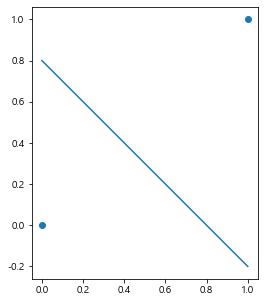

In [ ]:
x1 = np.linspace(0, 1, 100)
x2 = -x1 - (lsvm.intercept_[0] / lsvm.coef_[0,1])

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x1, x2)
ax.scatter([0, 1], [0, 1])
ax.set_aspect('equal')

[Quiz] 마진$(Margin(X) = \cfrac 1 {|w|} )$은 얼마나 될까?

In [ ]:
w = lsvm.coef_
b = lsvm.intercept_
1 / np.sqrt((w*w).sum())

1.202092463116915

한점과 하나의 직선간 거리를 계산:
- 결정경계선: $X \cdot w + b = 0$
- SV에 해당하는 점 $X^+$: (1, 1)
- 거리는 $\cfrac {|X^+ \cdot w + b|}{|w|^2}$

In [ ]:
from numpy.linalg import norm
np.abs(X[1].dot(w[0]) + b) / norm(w)**2

array([1.02000027])

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

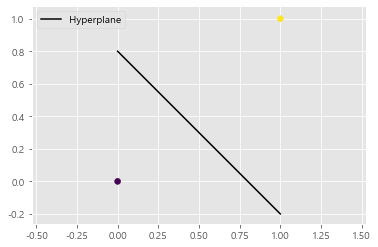

In [ ]:
w = lsvm.coef_[0]
b = lsvm.intercept_[0]
slope = - w[0] / w[1]

xx = np.linspace(0, 1, 6)
yy = slope * xx - b / w[1]

h0 = plt.plot(xx, yy, 'k-', label='Hyperplane')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.legend()
plt.show()

In [ ]:
slope, -b/w[0]

(-1.0, 0.8000053021136313)

In [ ]:
lsvm0 = svm.LinearSVC(C=100).fit(X, y)
print(lsvm0.coef_)
print(lsvm0.intercept_)

[[0.99125371 0.99125371]]
[-0.98746369]


In [ ]:
w = lsvm0.coef_[0]
b = lsvm0.intercept_[0]
- w[0] / w[1], - b / w[1]

(-1.0, 0.99617653969264)

#### 커널 트릭
![](https://mblogthumb-phinf.pstatic.net/MjAxNzExMDlfMjgw/MDAxNTEwMjMxNjA4NzYw.SwusLSsiU33wyJBKI0Yq5qUtSoqKeRFkiNcPensWZfgg.YX4asL-Zn_84Vn3BX774CIoLfE9O_2T4rSbHvCGKKl0g.PNG.sanghan1990/kernel.png?type=w800)
앞서 데이터셋에 비선형 특성을 추가하여 강력한 선형 모델을 생성하였다. 하지만 많은 경우:
- 어떤 특성을 추가해야 할지 모르고 
- 특성을 많이 추가하면 연산 비용이 커진다. 

다행히 수학적 기교를 사용해서 새로운 특성을 많이 만들지 않고서도 고차원에서 분류기를 학습시킬 수 있다. 이를 **커널 기법(kernel trick)** 이라 하며 실제로 데이터를 확장하지 않고도 확장된 특성에 대한 데이터 포인트들의 거리(더 정확히는 유사도를 측정하는 스칼라 곱)를 계산해준다.
$$\kappa(\mathbf x, \mathbf x^`) = \kappa(\mathbf x^`, \mathbf x) \ge 0$$

서포트 벡터 머신에서 데이터를 고차원 공간에 매핑하는 데 많이 사용하는 방법은 다음과 같다:
1. $X^n$을 생성하는 다항식 커널
$$\kappa(x_1, x_2) = (\gamma (x_1^Tx_2) + \theta)^d$$
2. $X$에 대한 다항정규(가우시안) 분포를 생성하는 RBF(radial basis function) 커널
$$\kappa(x_1, x_2) = \exp \left( -\gamma ||x_1-x_2||^2 \right)$$
3. 시그모이드 커널 (Sigmoid Kernel)
$$\kappa(x_1, x_2) = \tanh(\gamma (x_1^Tx_2) + \theta)$$

![svc](https://i1.wp.com/dataaspirant.com/wp-content/uploads/2017/01/Iris_Petal_Svm.png?w=800&ssl=1)

#### $\gamma$와 C 값에 따른 분류평면(hyperplain)의 효과
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FnKRmZ%2FbtqG6ILoyXX%2F0iw6vHMkoWlcIcrkypIY4K%2Fimg.png)

In [ ]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [449]:
X = np.array([[0,0], [1,1], [0,1], [1,0]])
y = np.array([0,0, 1,1])

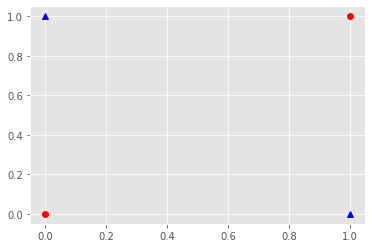

In [450]:
plt.plot(X[y==0,0], X[y==0,1], 'ro')
plt.plot(X[y!=0,0], X[y!=0,1], 'b^')

In [ ]:
SVM_XOR =SVC()
SVM_XOR.fit(X, y)

SVC()

In [451]:
test_data = np.array([[.8,.8], [.2, .9]]) ## 테스트 데이터 를 0.8 0.8 0. 0.9 로 줌 
SVM_XOR.predict(test_data)

array([False, False])

In [ ]:
plt.plot(X[y==0,0],X[y==0,1],'ro')
plt.plot(X[y!=0,0],X[y!=0,1],'b^')

In [466]:
np.random.seed(0)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:,0] > 0, X[:, 1] > 0) # 첫번째 변수가 양수이고 두번째 변수가 양수인것 

SVM_XOR.fit(X, y)

SVC()

In [467]:
X[:10]

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574]])

In [468]:
y[:10]

array([False, False,  True,  True,  True, False, False, False,  True,
        True])

In [469]:
test_data = np.array([[.8, .8], [-.9, .9]])
SVM_XOR.predict(test_data)

array([False,  True])

In [470]:
np.c_[xx.ravel(), yy.ravel()].shape ## 이건 무슨 뜻일까  
# 25만개 인 이유 xx.ravel m yy.ravel
# np.c 언더바를 해주면 두개 점들간의 쌍을 만들어준다. 

(250000, 2)

In [462]:
# x, y = np.linspace(1,-1,3),np.linspace(1,-1,3)
# print(x)
# print(y)

[ 1.  0. -1.]
[ 1.  0. -1.]


In [471]:
xx, yy = np.meshgrid(np.linspace(1,-1,3),np.linspace(1,-1,3))
print(xx)
print(yy)

[[ 1.  0. -1.]
 [ 1.  0. -1.]
 [ 1.  0. -1.]]
[[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'linetypes'
  if sys.path[0] == '':


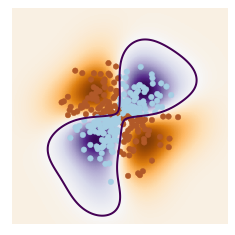

In [472]:
xx, yy = np.meshgrid(np.linspace(-5,5,500), # -5 부터 5까지 500개 포인트를 생성해라
                     np.linspace(-5,5,500)) # -5 부터 5까지 500개 포인트를 생성해라 
                     # meshgrid 라는 함수를 쓰면 x에 대응하는 y값을 만들어준다 말그래도 그물을 만들어주는 역할


Z = SVM_XOR.decision_function(np.c_[xx.ravel(), yy.ravel()]) # 디시전 펑션을 하면 25000개의 스코어 값이나온다.
Z = Z.reshape(xx.shape) # 500 by 500 의 스코어 

plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          aspect='equal', origin='lower', cmap=plt.cm.PuOr_r)
contours= plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes='-*-') # 0을 기준으로 등고선을 그려줘
# plt.countour 검색해서 속성 공부하기 
# 스코어가 0인 녀석만 등고선을 그려줘
# 빨갛고 파란건 imshow 가 그리는거고
# 진한선은 contour가 그려줌
# 그안에 점들은 scatter 가 그려준다. 
# c값과 감마값 조정가능 
# c값과 감마값을 조절하면서 다양한 그림들을 그려보자!
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.axis([-5,5,-5,5])
plt.show()
## 레디알 베이시스 펑션을 사용했다
## 문제가 발생했지만 잘 맞추고 있다. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linetypes'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linetypes'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linetypes'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linetypes'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linetypes'
/usr/local/lib/python3.7/dist-packages/ipykernel_launch

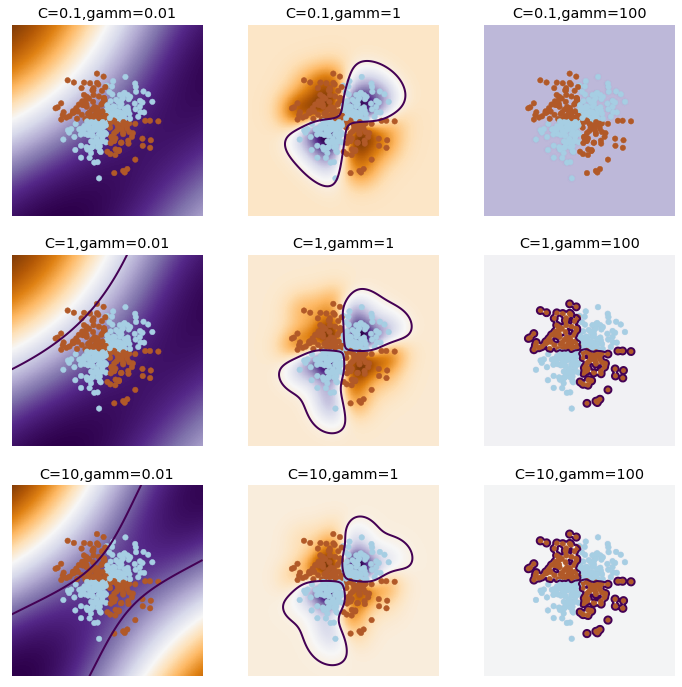

In [473]:
x, yy = np.meshgrid(np.linspace(-5,5,500), # -5 부터 5까지 500개 포인트를 생성해라
                     np.linspace(-5,5,500)) # -5 부터 5까지 500개 포인트를 생성해라 
                     # meshgrid 라는 함수를 쓰면 x에 대응하는 y값을 만들어준다 말그래도 그물을 만들어주는 역할


fig, axes = plt.subplots(3,3, figsize=(12, 12), sharex=True, sharey=True)
Cs,gammas = [.1,1,10], [.01,1,100]
for i,c in enumerate(Cs):
  for k,g in enumerate(gammas):
      svc = SVC(C=c,gamma=g)
      svc.fit(X,y)
      Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()]) # 디시전 펑션을 하면 25000개의 스코어 값이나온다.
      Z = Z.reshape(xx.shape) # 500 by 500 의 스코어 

      axes[i,k].imshow(Z, interpolation='nearest',
                extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                aspect='equal', origin='lower', cmap=plt.cm.PuOr_r)
      contours= axes[i,k].contour(xx, yy, Z, levels=[0], linewidths=2, linetypes='-*-') # 0을 기준으로 등고선을 그려줘
      # plt.countour 검색해서 속성 공부하기 
      # 스코어가 0인 녀석만 등고선을 그려줘
      # 빨갛고 파란건 imshow 가 그리는거고
      # 진한선은 contour가 그려줌
      # 그안에 점들은 scatter 가 그려준다. 
      # c값과 감마값 조정가능 
      # c값과 감마값을 조절하면서 다양한 그림들을 그려보자!
      axes[i,k].scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
      axes[i,k].set_xticks(())
      axes[i,k].set_yticks(())
      axes[i,k].axis([-5,5,-5,5])
      axes[i,k].set_title(f'C={c},gamm={g}')


#### IRIS 데이터 분석
SVM의 결정 경계면 $X \cdot w + b = 0$ 이므로, 선형분류기이다. 따라서, scaler가 필요하다.

In [474]:
from sklearn.datasets import load_iris
iris = load_iris()

In [475]:
from sklearn.model_selection import train_test_split # 트레인 테스트 분리하고
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    stratify=iris.target,
                                                    random_state=123)

In [476]:
from sklearn.svm import LinearSVC # 리니어svc
svm = LinearSVC().fit(X_train, y_train)
svm.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


1.0

In [477]:
from sklearn.svm import SVC # 커널이 있는 녀석을 쓰니까 0.97됨
svm = SVC().fit(X_train, y_train)
svm.score(X_test, y_test)

0.9736842105263158

SVC 튜닝하기

In [478]:
# gammas = [0.1, 1, 5, 10]
# Cs = [0.1, 0.5, 1.0, 10]
gammas = [0.01, 0.1, 1, 10]
Cs = [0.01, 0.1, 1, 10]
bestmodel = None
bestparams = {}
bestscore = 0
for gamma in gammas:
    for C in Cs:
        svm = SVC(gamma=gamma, C=C).fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > bestscore:
            bestscore = score
            bestmodel = svm
            bestparams["gamma"]=gamma
            bestparams["C"]=C
            print(f"present best score is {score}")
            print(f"best params is \n{bestparams}")
        if bestscore == 1:
            break

present best score is 0.3157894736842105
best params is 
{'gamma': 0.01, 'C': 0.01}
present best score is 0.6052631578947368
best params is 
{'gamma': 0.01, 'C': 0.1}
present best score is 0.9473684210526315
best params is 
{'gamma': 0.01, 'C': 1}
present best score is 1.0
best params is 
{'gamma': 0.1, 'C': 10}


[Quiz] breast cancer 데이터를 SVC를 이용하여 모델 튜닝을 하여 성능을 높이도록 하자.

In [479]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target,
                                                    random_state=123)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
## 파이프라인 적어도 될듯 

In [480]:
# gammas = [0.01, 0.05, 0.1]
# gammas = [0.1, 1, 5, 10]
# Cs = [0.1, 0.5, 1.0, 10]
gammas = [0.01, 0.1, 1, 10]
Cs = [0.01, 0.1, 1, 10]
bestmodel = svm
bestparams = {}
bestscore = 0
for gamma in gammas:
    for C in Cs:
        svm = SVC(gamma=gamma, C=C).fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > bestscore:
            bestscore = score
            bestmodel = svm
            bestparams["gamma"]=gamma
            bestparams["C"]=C
            print(f"present best score is {score}")
            print(f"best params is \n{bestparams}")
        if bestscore == 1:
            break

present best score is 0.6293706293706294
best params is 
{'gamma': 0.01, 'C': 0.01}
present best score is 0.951048951048951
best params is 
{'gamma': 0.01, 'C': 0.1}
present best score is 0.972027972027972
best params is 
{'gamma': 0.01, 'C': 1}


[Quiz] titanic 데이터에 대해 SVC를 튜닝하여 best score를 구하고, 이 때의 param가 얼마가 되는 지 출력하자.
- 참고: https://www.kaggle.com/hasanburakavci/titanic-eda-and-classification-top-5

In [481]:
import seaborn as sns
data = sns.load_dataset('titanic')

In [482]:
X_train, X_test, y_train, y_test = train_test_split(prep_data.iloc[:, 1:], 
                                                   prep_data.iloc[:, 0],
                                                   random_state=42)

In [483]:
gammas = [0.01, 0.1, 1, 10, 100]
Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1]
Cs = [10, 100, 1000]
gammas = [0.0001, 0.001, 0.01]
Cs = [10, 100, 1000]
gammas = [0.00005, 0.0001, 0.005]
Cs = [5000, 10000, 50000]
gammas = [0.000025, 0.00005, 0.000075]
Cs = [50000, 70000, 90000]
gammas = [0.00004, 0.00005, 0.00006]
Cs = [60000, 70000, 80000]
bestmodel = svm
bestparams = {}
bestscore = 0
for gamma in gammas:
    for C in Cs:
        svm = SVC(gamma=gamma, C=C).fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > bestscore:
            bestscore = score
            bestmodel = svm
            bestparams["gamma"]=gamma
            bestparams["C"]=C
            print(f"present best score is {score}")
            print(f"best params is \n{bestparams}")
        if bestscore == 1:
            break

present best score is 0.8026905829596412
best params is 
{'gamma': 4e-05, 'C': 60000}



[further study]

- https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
- https://scikit-learn.org/stable/supervised_learning.html
- https://towardsdatascience.com/writing-your-own-scikit-learn-classes-for-beginners-1e4e7d4de203
- https://scikit-learn.org/stable/developers/develop.html